In [1]:
import json
import numpy as np
import rich

In [2]:
with open('taskeval_actual_movement_coop_without_flausible.json', 'r') as f:
    actual_wocf = json.load(f)

with open('taskeval_actual_movement_coop_flausible.json', 'r') as f:
    actual_wcf = json.load(f)
    
with open('taskeval_llama_dialogue_movement_coop_with_flausible.json', 'r') as f:
    model_wcf = json.load(f)
    
with open("taskeval_llama_dialogue_movement_coop_without_flausible.json", 'r') as f:
    model_wocf = json.load(f)
    
with open("taskeval_actual_movement_coop_with_actual_move.json", 'r') as f:
    with_actual = json.load(f)
    
with open("taskeval_llama_dialogue_movement_coop_with_actual.json", 'r') as f:
    llama_with_actual = json.load(f)
# with open("taskeval_1757_llama_fewshot_end_turns_8.json", 'r') as f:
#     llama_few_shot_turns_8 = json.load(f)
    
# with open("taskeval_1757_llama_fewshot_end_turns_10.json", 'r') as f:
#     llama_few_shot_turns_10 = json.load(f)
    
# with open("taskeval_1757_llama_fewshot_end_turns_12.json", 'r') as f:
#     llama_few_shot_turns_12 = json.load(f)
    
# with open("taskeval_llama_70b.json", "r") as f:
#     llama_70b_plausible = json.load(f)
countries_list = ['Austria', 'England', 'France', 'Germany', 'Italy', 'Russia', 'Turkey']

In [3]:
def get_score_with_env(countries, prediction):
    scores = 0
    for c in countries:
        scores += prediction[c][c.upper()][1]
    score_dict = {}
    score_dict['env'] = prediction['env_uuid']
    score_dict['scores'] = scores / len(countries)
    return score_dict

def get_score_dict_from_dialogue(dialogue):
    score_list = []
    for a in dialogue:
        keys = []
        for vkeys in a.keys():
            if vkeys in countries_list:
                keys.append(vkeys)
        score_list.append(get_score_with_env(keys, a))
    return score_list

In [4]:
# human_few_shot_score_dict = get_score_dict_from_dialogue(human_few_shot)
# actual_few_shot_score_dict = get_score_dict_from_dialogue(actual_few_shot)
# llama_few_shot_score_dict = get_score_dict_from_dialogue(llama_few_shot_whole)
# llama_few_shot_turns_6_score_dict = get_score_dict_from_dialogue(llama_few_shot_turns_6)
# llama_few_shot_turns_8_score_dict = get_score_dict_from_dialogue(llama_few_shot_turns_8)
# llama_70b_plausible_score_dict = get_score_dict_from_dialogue(llama_70b_plausible)
# llama_few_shot_turns_10_score_dict = get_score_dict_from_dialogue(llama_few_shot_turns_10)
# llama_few_shot_turns_12_score_dict = get_score_dict_from_dialogue(llama_few_shot_turns_12)
# actual_movement_score_dict = get_score_dict_from_dialogue(actual_movement)
# human_dialogue_score_dict = get_score_dict_from_dialogue(human_dialogue)
# actual_dialogue_score_dict[0]
actual_wocf_score = get_score_dict_from_dialogue(actual_wocf)
actual_wcf_score = get_score_dict_from_dialogue(actual_wcf)
model_wcf_score = get_score_dict_from_dialogue(model_wcf)
model_wocf_score = get_score_dict_from_dialogue(model_wocf)
with_actual_score = get_score_dict_from_dialogue(with_actual)
llama_with_actual_score = get_score_dict_from_dialogue(llama_with_actual)

In [5]:
# len(model_wcf_score), len(nmodel_wocf_score)
len(with_actual_score), len(llama_with_actual_score)

(482, 17)

In [6]:
import random
random.seed(42)
nmodel_wocf_score = random.sample(model_wocf_score, len(model_wcf_score))
nactual_wcf_score = random.sample(actual_wcf_score, len(model_wcf_score))

In [15]:
mean_actual = np.mean([w['scores'] for w in with_actual_score])
std_actual = np.std([w['scores'] for w in with_actual_score])
print("Mean: ", mean_actual)
print("STD: ", std_actual)
mean_actual + std_actual*2


Mean:  0.004331207969966823
STD:  0.05329800348017842


0.11092721493032366

In [20]:
larger_than_two_std = [w['env'] for w in with_actual_score if w['scores'] > mean_actual + std_actual*2]
# print(len(larger_than_two_std))
larger_than_two_std

['01JBDMK2DHZ67BV0EVJGK13E8Z',
 '01JBDMK12CAB7SVDTEB55MAR4V',
 '01JBDMK1XSF38TSJ813R182E1S',
 '01JBDMK17YB39HV72VRDCFNM7X',
 '01JBDMK0SS526CVGNS8DTXD6K6',
 '01JBDMK27T1Y9303XVZDB27R4W',
 '01JBDMK2336X5YF6R1VAEP64MC',
 '01JBDMK1VXH11P04TM8V4ZY54Z',
 '01JBDMK0X5A3QE57DWGM7HNMPH',
 '01JBDMK1TBHKS824WG61M27YQJ',
 '01JBDMK1KFJMZNHHZD37RJEEQQ',
 '01JBDMK2C9K275FEMPVBWWRDV7',
 '01JBDMK1ZVFDTAWWR4GBJ7ZYDV']

In [7]:
actual_wcf_score

[{'env': '01J9BTDSV50FSMEWTWVMTAX6PF', 'scores': -0.018657710344996303},
 {'env': '01J9BTDT5GK912JBM5S0RV1ZNV', 'scores': 0.005255419760942459},
 {'env': '01J9BTDTEZ4JMP0MRBEEQ9RXX0', 'scores': -0.062045376282185316},
 {'env': '01J9BTDTGXBPGR57BWCFJ97S1B', 'scores': 0.027463954320410267},
 {'env': '01J9BTDT91K126SY7EJM9WK3S4', 'scores': -0.004041507956571877},
 {'env': '01J9BTDTMYBMZQQ7WB7BM4Z3RW', 'scores': -0.1620632188860327},
 {'env': '01J9BTDTDV56MSD9MHFAR6Q73J', 'scores': 0.05520637147128582},
 {'env': '01J9BTDTT9PRXK5P42G503ECAS', 'scores': 0.009259249549359083},
 {'env': '01J9BTDT6V7NX7H6P46FZZEAC8', 'scores': 0.003191877040080726},
 {'env': '01J9BTDTH5TK8AVG9B8TTAXHNX', 'scores': -0.0028856649296358228},
 {'env': '01J9BTDTJ3MBBZFZDYPEX8T89P', 'scores': -0.09059874666854739},
 {'env': '01J9BTDT7KA05TAFMH16D85XZF', 'scores': 0.03371482598595321},
 {'env': '01J9BTDSTRZVNBK4EZAT1SEMBH', 'scores': 0.014552414417266846},
 {'env': '01J9BTDTC10KA9MYVGDM3WXK0R', 'scores': -0.0694832480

In [8]:
high_actual_movement = [score for score in with_actual_score if score['scores'] >= 0.1]
high_actual_movement

[{'env': '01JBDMK2DHZ67BV0EVJGK13E8Z', 'scores': 0.19779285788536072},
 {'env': '01JBDMK12CAB7SVDTEB55MAR4V', 'scores': 0.16259623691439629},
 {'env': '01JBDMK0QSFXSTCHT4BQHZ56C7', 'scores': 0.10819064639508724},
 {'env': '01JBDMK1XSF38TSJ813R182E1S', 'scores': 0.1415375955402851},
 {'env': '01JBDMK17YB39HV72VRDCFNM7X', 'scores': 0.1405390240252018},
 {'env': '01JBDMK0SS526CVGNS8DTXD6K6', 'scores': 0.126529760658741},
 {'env': '01JBDMK27T1Y9303XVZDB27R4W', 'scores': 0.1774552809074521},
 {'env': '01JBDMK27WJVFGK8SSWGMG93CM', 'scores': 0.10775651689618826},
 {'env': '01JBDMK2336X5YF6R1VAEP64MC', 'scores': 0.1706826575100422},
 {'env': '01JBDMK1VXH11P04TM8V4ZY54Z', 'scores': 0.23703179322183132},
 {'env': '01JBDMK0X5A3QE57DWGM7HNMPH', 'scores': 0.2915705256164074},
 {'env': '01JBDMK17SZQQ3FG5CACVDSYE5', 'scores': 0.10067855566740036},
 {'env': '01JBDMK1TBHKS824WG61M27YQJ', 'scores': 0.17362235393375158},
 {'env': '01JBDMK1KFJMZNHHZD37RJEEQQ', 'scores': 0.19859473407268524},
 {'env': '01J

In [9]:
llama_with_actual_score

[{'env': '01JBDMK2DHZ67BV0EVJGK13E8Z', 'scores': 0.2311714142560959},
 {'env': '01JBDMK1TBHKS824WG61M27YQJ', 'scores': 0.26222324278205633},
 {'env': '01JBDMK0QSFXSTCHT4BQHZ56C7', 'scores': 0.08851488493382931},
 {'env': '01JBDMK27WJVFGK8SSWGMG93CM', 'scores': 0.10549215693026781},
 {'env': '01JBDMK17SZQQ3FG5CACVDSYE5', 'scores': 0.10625774413347244},
 {'env': '01JBDMK12CAB7SVDTEB55MAR4V', 'scores': 0.12716855481266975},
 {'env': '01JBDMK17YB39HV72VRDCFNM7X', 'scores': 0.13343700021505356},
 {'env': '01JBDMK1ZVFDTAWWR4GBJ7ZYDV', 'scores': 0.09702570363879204},
 {'env': '01JBDMK27T1Y9303XVZDB27R4W', 'scores': 0.20020776707679033},
 {'env': '01JBDMK1VXH11P04TM8V4ZY54Z', 'scores': 0.23703179322183132},
 {'env': '01JBDMK2336X5YF6R1VAEP64MC', 'scores': 0.04452253878116608},
 {'env': '01JBDMK0SS526CVGNS8DTXD6K6', 'scores': 0.12833429127931595},
 {'env': '01JBDMK1KFJMZNHHZD37RJEEQQ', 'scores': 0.08672340121120214},
 {'env': '01JBDMK2CMQ5NNDY6D01K1BQ1G', 'scores': 0.10344644635915756},
 {'env'

In [10]:
len(high_actual_movement), len(llama_with_actual_score)

(17, 17)

/tmp/ipykernel_65234/1225045180.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1, shade=True, color='skyblue', alpha=1, linewidth=2, label='High Acutal Movement')
/tmp/ipykernel_65234/1225045180.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='green', alpha=0.5, linewidth=2, label='Llama with Actual Movement')


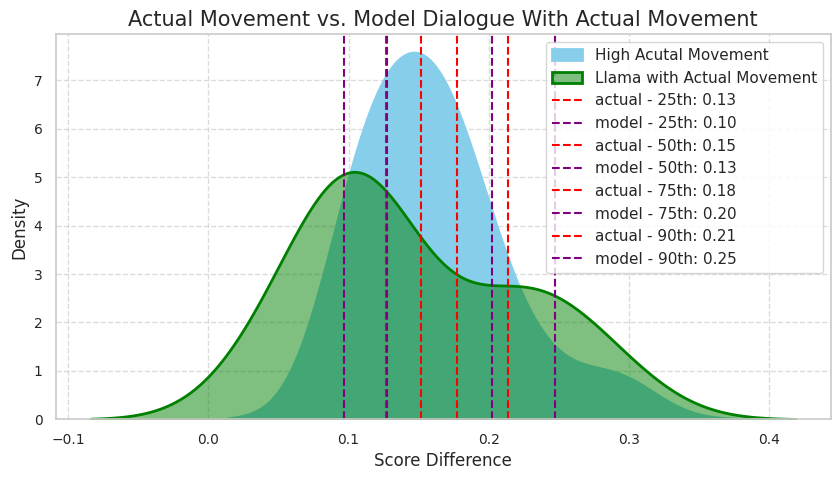

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TODO: add comparison between human and actual movement
# data1 = [d['scores'] for d in human_few_shot_score_dict if d['scores'] >= 0.06]
data1 = [d['scores'] for d in high_actual_movement]
data2 = [d['scores'] for d in llama_with_actual_score]
# data3 = [d['scores'] for d in nactual_wcf_score if d['scores'] >= 0.00]

sns.set(style="whitegrid")

# 密度图
plt.figure(figsize=(10, 5))
# sns.kdeplot(data3, shade=True, color='purple', alpha=0.8, linewidth=2, label='Actual Dialogue with plausible')
sns.kdeplot(data1, shade=True, color='skyblue', alpha=1, linewidth=2, label='High Acutal Movement')
sns.kdeplot(data2, shade=True, color='green', alpha=0.5, linewidth=2, label='Llama with Actual Movement')

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score1 = np.percentile(data1, percentile)
    plt.axvline(x=score1, color='red', linestyle='--', label=f'actual - {percentile}th: {score1:.2f}')
    score2 = np.percentile(data2, percentile)
    plt.axvline(x=score2, color='purple', linestyle='--', label=f'model - {percentile}th: {score2:.2f}')

plt.title('Actual Movement vs. Model Dialogue With Actual Movement', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [12]:
def sub_score(score_list_1, score_list_2):
    model_score_dict = {item['env']: item['scores'] for item in score_list_2}
    results = []
    for item in score_list_1:
        env = item['env']
        score1 = item['scores']
        score2 = model_score_dict.get(env)
        if score2 == None:
            continue
        results.append({"env": item['env'], "scores": score1 - score2})
    return results


In [13]:
sub = sub_score(llama_with_actual_score, high_actual_movement)
sub, len(sub)

([{'env': '01JBDMK2DHZ67BV0EVJGK13E8Z', 'scores': 0.03337855637073517},
  {'env': '01JBDMK1TBHKS824WG61M27YQJ', 'scores': 0.08860088884830475},
  {'env': '01JBDMK0QSFXSTCHT4BQHZ56C7', 'scores': -0.019675761461257935},
  {'env': '01JBDMK27WJVFGK8SSWGMG93CM', 'scores': -0.0022643599659204483},
  {'env': '01JBDMK17SZQQ3FG5CACVDSYE5', 'scores': 0.0055791884660720825},
  {'env': '01JBDMK12CAB7SVDTEB55MAR4V', 'scores': -0.03542768210172653},
  {'env': '01JBDMK17YB39HV72VRDCFNM7X', 'scores': -0.007102023810148239},
  {'env': '01JBDMK1ZVFDTAWWR4GBJ7ZYDV', 'scores': -0.04248868674039841},
  {'env': '01JBDMK27T1Y9303XVZDB27R4W', 'scores': 0.022752486169338226},
  {'env': '01JBDMK1VXH11P04TM8V4ZY54Z', 'scores': 0.0},
  {'env': '01JBDMK2336X5YF6R1VAEP64MC', 'scores': -0.12616011872887611},
  {'env': '01JBDMK0SS526CVGNS8DTXD6K6', 'scores': 0.0018045306205749512},
  {'env': '01JBDMK1KFJMZNHHZD37RJEEQQ', 'scores': -0.1118713328614831},
  {'env': '01JBDMK2CMQ5NNDY6D01K1BQ1G', 'scores': 0.0},
  {'env':

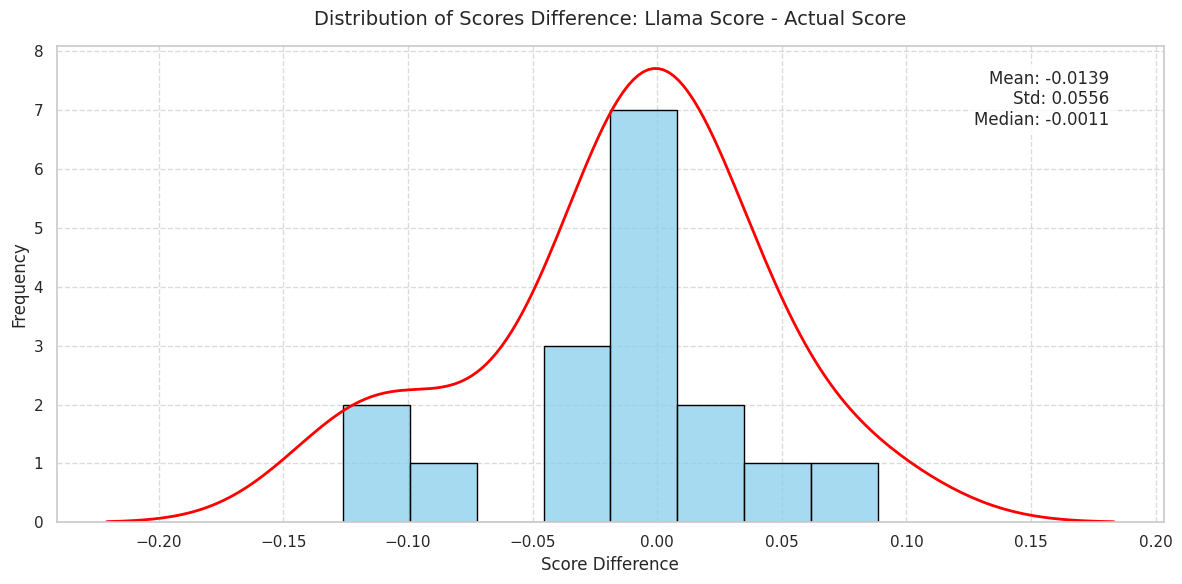

In [14]:
import pandas as pd
df = pd.DataFrame(sub)
scores = df['scores']

plt.style.use('default')
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.histplot(data=scores, bins=8, color='skyblue', edgecolor='black')

sns.kdeplot(data=scores, color='red', linewidth=2)

plt.title('Distribution of Scores Difference: Llama Score - Actual Score', fontsize=14, pad=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

stats_text = f'Mean: {scores.mean():.4f}\nStd: {scores.std():.4f}\nMedian: {scores.median():.4f}'
plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

plt.show()